In [1]:
import ast

import pandas as pd

from coba import Environments
from coba import RandomLearner, VowpalOffPolicyLearner, Experiment, SimpleEvaluation

In [2]:
file_name = 'lambda_logs_6.csv'
df_csv = pd.read_csv(file_name, converters={column: ast.literal_eval for column in
                                            ['context', 'action', 'actions', 'probability', 'reward', 'rewards']})
df_csv.insert(0, 'actions', [[0,1] for row in range(len(df_csv.index))])
df_csv

,actions,Unnamed: 0,environment_id,learner_id,index,reward,action,context,ope_loss,probability,rewards
0,"[0, 1]",0,0,0,1,0,0,"{'feature_1': 0.10863548330962658, 'feature_2'...",0.000000,0.500000,"[0, 0]"
1,"[0, 1]",1,0,0,2,0,1,"{'feature_1': 0.6377932336181402, 'feature_2':...",0.000000,0.500000,"[1, 0]"
2,"[0, 1]",2,0,0,3,1,0,"{'feature_1': 0.8407034799456596, 'feature_2':...",-1.000000,0.500000,"[1, 0]"
3,"[0, 1]",3,0,0,4,0,0,"{'feature_1': 0.030388953164219856, 'feature_2...",-1.000000,0.500000,"[0, 1]"
4,"[0, 1]",4,0,0,5,0,0,"{'feature_1': 0.2219219021499157, 'feature_2':...",-1.000000,0.500000,"[0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...
4995,"[0, 1]",4995,0,0,4996,1,0,"{'feature_1': 0.8529048254713416, 'feature_2':...",-2897.000285,0.966821,"[1, 0]"
4996,"[0, 1]",4996,0,0,4997,1,0,"{'feature_1': 0.37998570408672094, 'feature_2'...",-2898.000282,0.437888,"[1, 1]"
4997,"[0, 1]",4997,0,0,4998,1,0,"{'feature_1': 0.7861800072714686, 'feature_2':...",-2899.000282,0.989210,"[1, 1]"
4998,"[0, 1]",4998,0,0,4999,0,1,"{'feature_1': 0.6505903694778681, 'feature_2':...",-2899.000282,0.366356,"[0, 0]"


In [3]:
env = Environments.from_dataframe(df=df_csv)
learners = [VowpalOffPolicyLearner([1, 'x', 'a', 'ax', 'axx']), RandomLearner()]
evaluation = SimpleEvaluation(record=['context','actions','rewards','action','reward','probability','ope_loss'])

In [4]:
result = Experiment(env, learners, evaluation_task=evaluation).run(quiet=True)

In [5]:
result

{'Learners': 2, 'Environments': 1, 'Interactions': 10000}


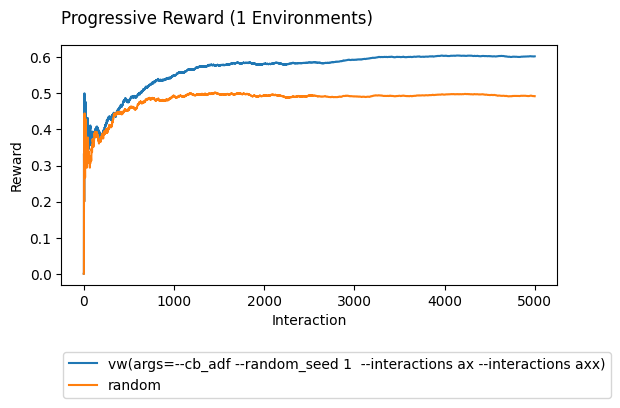

In [6]:
result.plot_learners()